4. Let's create a small 3D array from scratch. Below are the inputs for the array. Use the `xr.DataArray()` function to create a DataArray from the inputs. The array will represent monthly NDVI values over 4 time steps. Be sure to specify both dimensions and coordinates.

In [ ]:
import numpy as np

In [ ]:
ndvi_values = np.random.rand(4, 5, 6)

time = ['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
latitude  = [34.3, 34.4, 34.5, 34.6, 34.7]
longitude = [-118.3, -118.2, -118.1, -118.0, -117.9, -117.8]


In [ ]:
ndvi = xr.DataArray(
    ndvi_values, 
    dims = ['time', 'latitude', 'longitude'],
    coords=[time, latitude, longitude]
    )

Using the OISST dataset

### Question 3

Let's say that your study area is the Gulf of Guinea. This includes are from Angola to Liberia, which happens to cross the prime meridian (as well as the infamous [Null island](https://www.atlasobscura.com/articles/null-island-is-one-of-the-most-visited-places-on-earth-too-bad-it-doesnt-exist))).

**A)** Begin by attempting to select the data for this study region and make a plot. You will eventually see that there is a problem with doing this the way the data are currently organized.  What is it?

In [ ]:
sst.sel(lat=slice(-15, 5), lon=slice(350, 15))

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 80, lon: 0)
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -14.88 -14.62 -14.38 -14.12 ... 4.375 4.625 4.875
  * lon      (lon) float32 
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20220304.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2022-03-04T00:00:00Z
    time_coverage_end:          2022-03-04T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

In [ ]:
# The study area wraps around the ends of the dataset, so there are 
# no longitudes in the return value

**B)** As an alternate approach, let's try assigning new coordinate values to latitude.

**C)** With the new coordinate values in place, plot the data in the study region.

In [ ]:
sst.sst.sel(lat=slice(-15, 5), lon=slice(350, 15)).isel(time=0, zlev=0).plot()

### Question 4

- expand/squeeze dimensions for Part 2 homework https://docs.xarray.dev/en/stable/user-guide/reshaping.html#expand-and-squeeze-dimensions

### Question 5

https://docs.xarray.dev/en/stable/user-guide/indexing.html#selecting-values-with-isin ? (need a different array for this, or maybe try this with the `ice` DataArray of sst.)

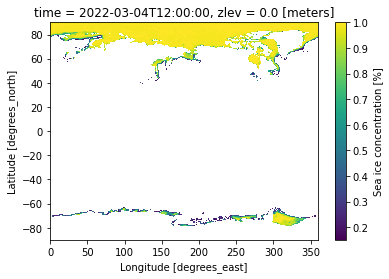

In [ ]:
sst.ice.isel(time=0, zlev=0).plot()